<h1 style='text-align:center;font-weight:bold;color:white'> Birth Weight Analysis</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.gofplots import qqplot

In [35]:
data = pd.read_csv("baby_weight.csv")
data.head(5)

,id,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt,race2,race3
0,85,0,19,182,black,0,0,0,1,0,2523,1,0
1,86,0,33,155,other,0,0,0,0,3,2551,0,1
2,87,0,20,105,white,1,0,0,0,1,2557,0,0
3,88,0,21,108,white,1,0,0,1,2,2594,0,0
4,89,0,18,107,white,1,0,0,1,0,2600,0,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      189 non-null    int64 
 1   low     189 non-null    int64 
 2   age     189 non-null    int64 
 3   lwt     189 non-null    int64 
 4   race    189 non-null    object
 5   smoke   189 non-null    int64 
 6   ptl     189 non-null    int64 
 7   ht      189 non-null    int64 
 8   ui      189 non-null    int64 
 9   ftv     189 non-null    int64 
 10  bwt     189 non-null    int64 
 11  race2   189 non-null    int64 
 12  race3   189 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 19.3+ KB


In [37]:
data.describe()

,id,low,age,lwt,smoke,ptl,ht,ui,ftv,bwt,race2,race3
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,121.079365,0.312169,23.238095,129.820106,0.391534,0.195767,0.063492,0.148148,0.793651,2944.285714,0.137566,0.354497
std,63.303634,0.464609,5.298678,30.575150,0.489390,0.493342,0.244494,0.356190,1.059286,729.016018,0.345359,0.479631
min,4.000000,0.000000,14.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,709.000000,0.000000,0.000000
25%,68.000000,0.000000,19.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2414.000000,0.000000,0.000000
50%,123.000000,0.000000,23.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2977.000000,0.000000,0.000000
75%,176.000000,1.000000,26.000000,140.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3475.000000,0.000000,1.000000
max,226.000000,1.000000,45.000000,250.000000,1.000000,3.000000,1.000000,1.000000,6.000000,4990.000000,1.000000,1.000000


In [38]:
data.describe(include=object)

,race
count,189
unique,3
top,white
freq,96


In [3]:
# Create race segmentation
data['race_white'] = (data['race'] == 'white').astype(int)
data['race_black'] = (data['race'] == 'black').astype(int)
data['race_other'] = (data['race'] == 'other').astype(int)

In [4]:
# Drop original 'race' column and 'race2', 'race3' columns
data = data.drop(['race', 'race2', 'race3'], axis=1)

In [5]:
X = data[['low', 'age', 'lwt', 'smoke', 'ptl', 'ht', 'ui', 'ftv', 'race_white', 'race_black', 'race_other']]
y = data['bwt']

In [6]:
model = sm.OLS(y, sm.add_constant(X)).fit()

In [7]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    bwt   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     35.74
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           1.60e-37
Time:                        21:56:06   Log-Likelihood:                -1409.4
No. Observations:                 189   AIC:                             2841.
Df Residuals:                     178   BIC:                             2877.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2517.0669    152.368     16.520      0.0

# Classical assumptions tests

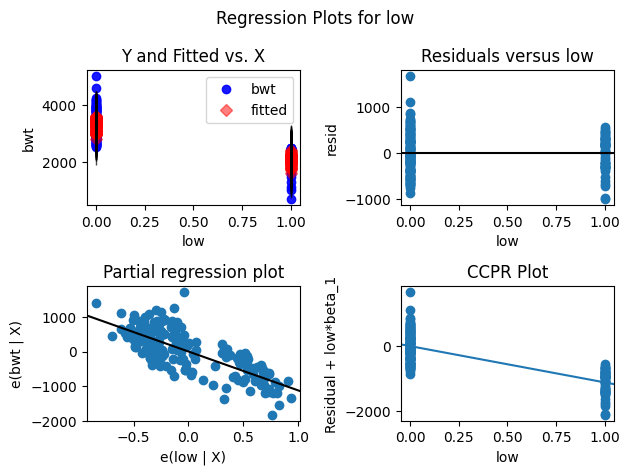

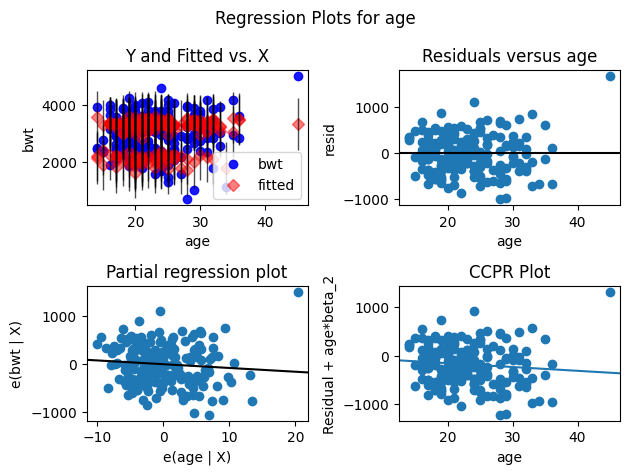

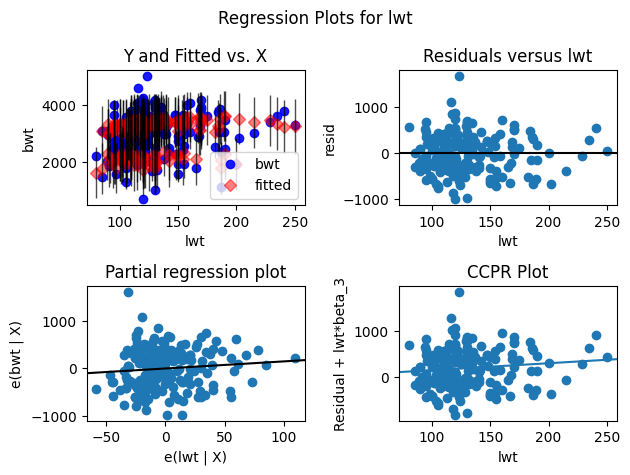

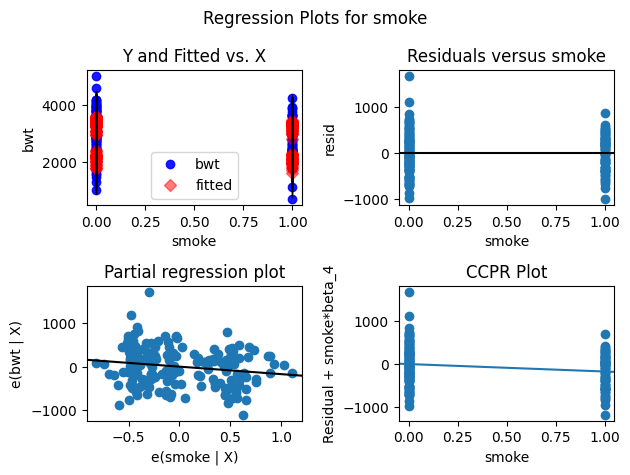

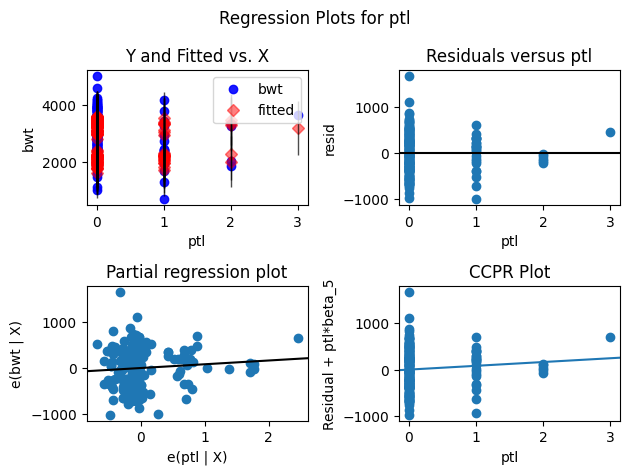

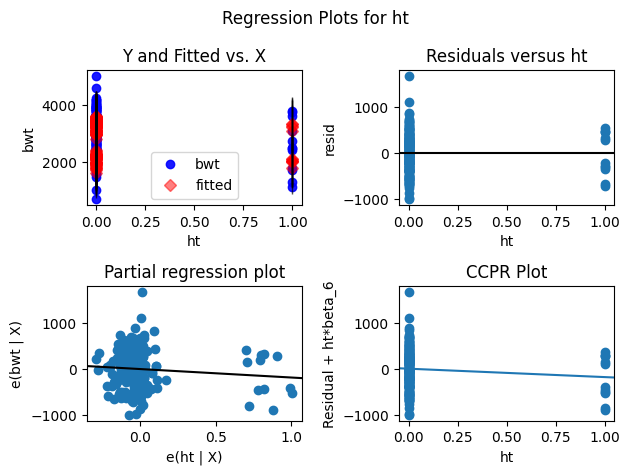

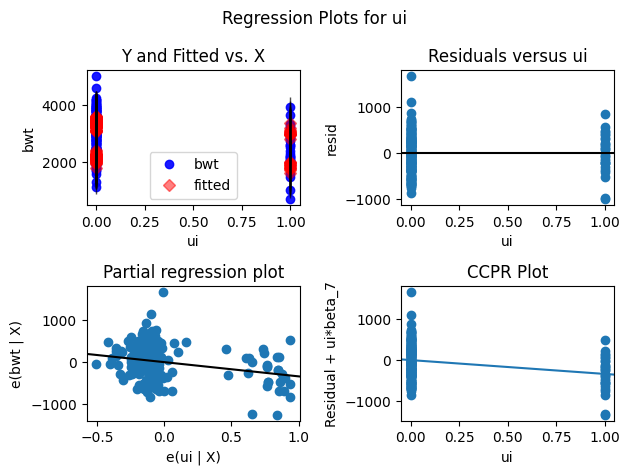

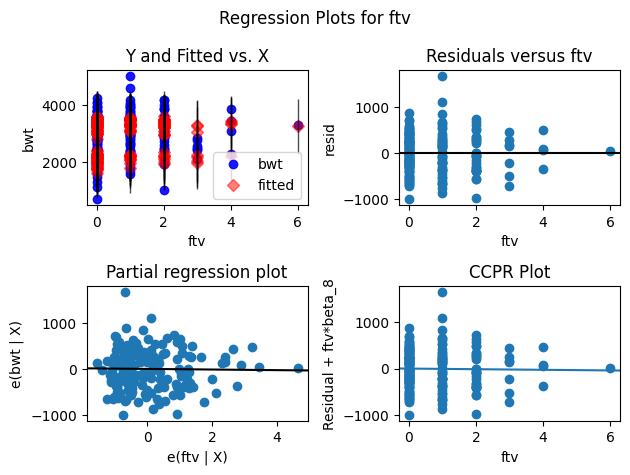

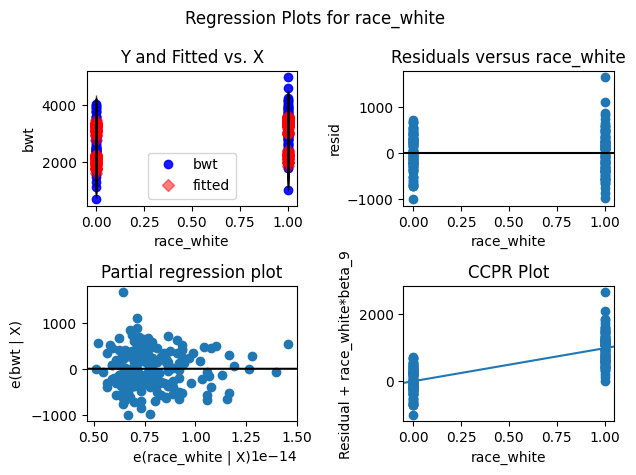

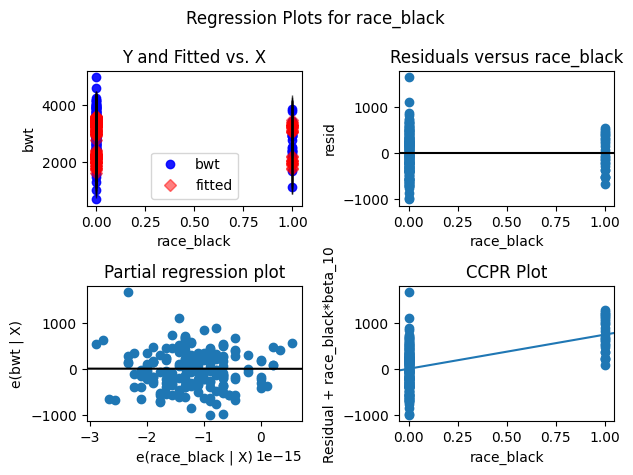

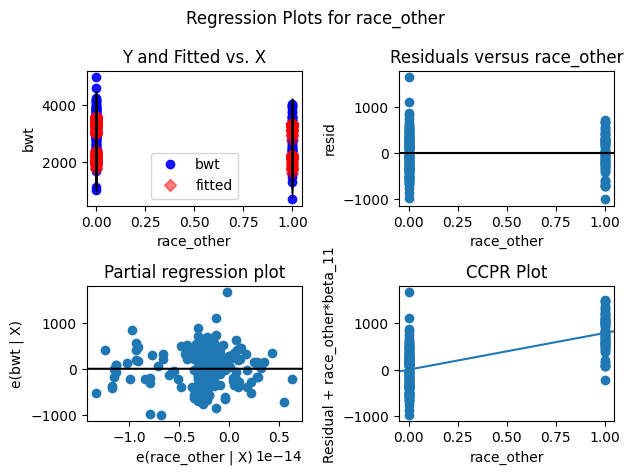

In [9]:
# Linearity
for col in X.columns:
    fig = sm.graphics.plot_regress_exog(model, col)
    plt.tight_layout()
    plt.show()

In [10]:
# Multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

       feature        VIF
0          low   1.195769
1          age   1.157140
2          lwt   1.285694
3        smoke   1.240958
4          ptl   1.143107
5           ht   1.132147
6           ui   1.105116
7          ftv   1.077403
8   race_white  22.966243
9   race_black   6.994898
10  race_other  13.678818


<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Asus\AppData\Local\Temp\ipykernel_49428\3771260633.py:13: SyntaxWarning: invalid escape sequence '\s'
  ax.set_ylabel('$\sqrt{|Standardized residuals|}$')


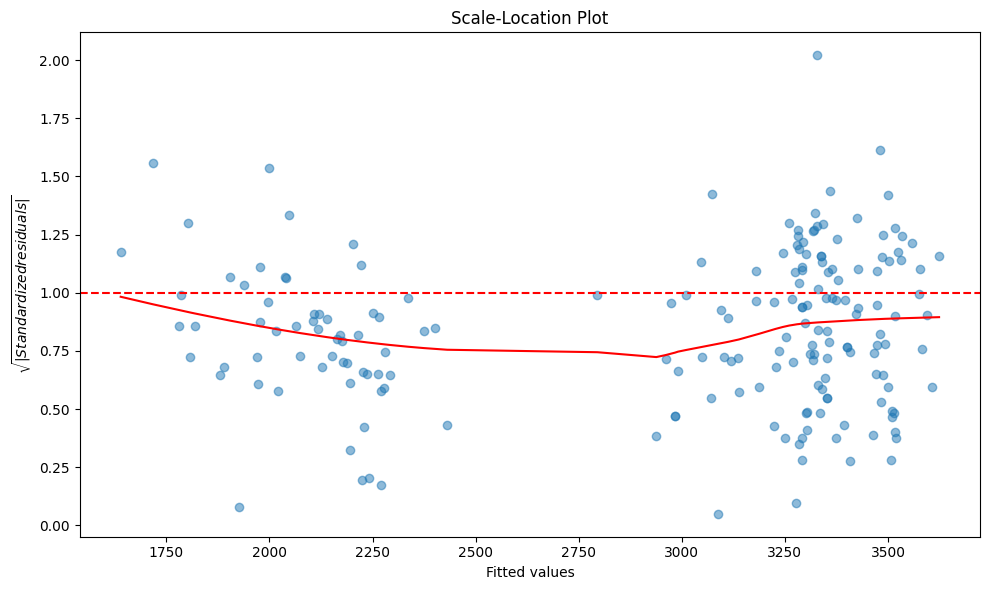

In [12]:
# Homoscedasticity
fig, ax = plt.subplots(figsize=(10, 6))

standardized_residuals = model.get_influence().resid_studentized_internal

sqrt_abs_resid = np.sqrt(np.abs(standardized_residuals))

ax.scatter(model.fittedvalues, sqrt_abs_resid, alpha=0.5)
ax.set_xlabel('Fitted values')
ax.set_ylabel('$\sqrt{|Standardized residuals|}$')
ax.set_title('Scale-Location Plot')

ax.axhline(y=1, color='r', linestyle='--')

smoothed = sm.nonparametric.lowess(sqrt_abs_resid, model.fittedvalues)
ax.plot(smoothed[:, 0], smoothed[:, 1], color='r')

plt.tight_layout()
plt.show()

In [13]:
# heteroscedasticity
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print("Breusch-Pagan test for heteroscedasticity")
print(dict(zip(labels, bp_test)))

Breusch-Pagan test for heteroscedasticity
{'LM Statistic': np.float64(24.65114201532785), 'LM-Test p-value': np.float64(0.010250586739569188), 'F-Statistic': np.float64(2.6698714749436165), 'F-Test p-value': np.float64(0.00459400815348743)}


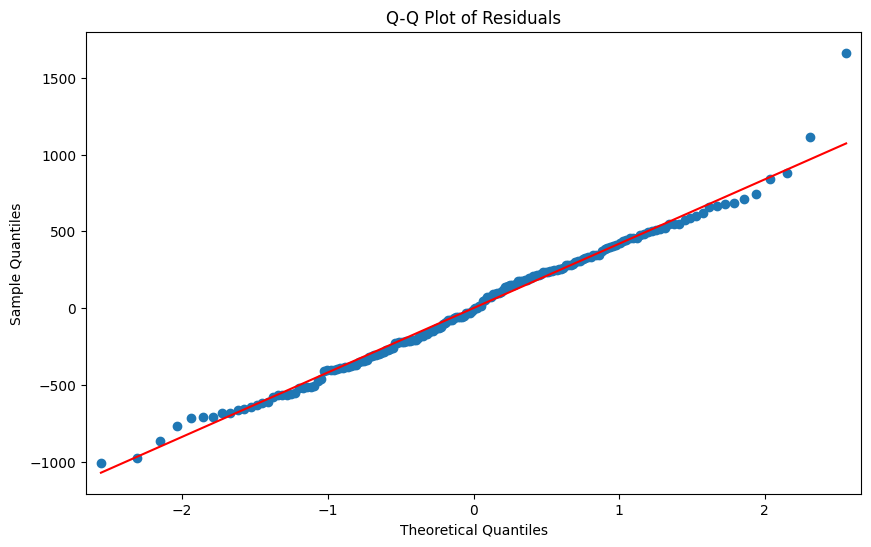

Normality test p-value: 0.15944561131318238


In [14]:
# Normality of residuals
fig, ax = plt.subplots(figsize=(10, 6))
sm.qqplot(model.resid, line='s', ax=ax)
plt.title('Q-Q Plot of Residuals')
plt.show()

_, p_value = stats.normaltest(model.resid)
print(f"Normality test p-value: {p_value}")

In [15]:
# Autocorrelation
print(f"Durbin-Watson statistic: {durbin_watson(model.resid)}")

Durbin-Watson statistic: 0.49875306281225185


# Model selection procedure

In [16]:
# Stepwise regression (both directions)
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out = 0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # Forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # Backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

selected_features = stepwise_selection(X, y)
print("Selected features:", selected_features)

Add  low                            with p-value 9.65004e-41
Add  ui                             with p-value 0.000646801
Selected features: ['low', 'ui']


In [17]:
# Final model with selected features
final_model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    bwt   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     165.0
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           6.16e-42
Time:                        21:56:46   Log-Likelihood:                -1417.1
No. Observations:                 189   AIC:                             2840.
Df Residuals:                     186   BIC:                             2850.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3362.9472     39.831     84.431      0.0

# Checking for non-linear relationships

In [18]:
# Adding polynomial terms for continuous variables
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X[['age', 'lwt']])
X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(['age', 'lwt']))
X_combined = pd.concat([X_poly, X.drop(['age', 'lwt'], axis=1)], axis=1)

poly_model = sm.OLS(y, sm.add_constant(X_combined)).fit()
print(poly_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    bwt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     30.31
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           4.34e-38
Time:                        21:56:47   Log-Likelihood:                -1402.1
No. Observations:                 189   AIC:                             2832.
Df Residuals:                     175   BIC:                             2878.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2843.6698    621.507      4.575      0.0

In [23]:
# Compare models
from statsmodels.stats.anova import anova_lm
pd.DataFrame(anova_lm(model, final_model, poly_model))

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,178.0,3.321493e+07,0.0,NaN,NaN,NaN
1,186.0,3.601730e+07,-8.0,-2.802375e+06,1.994833,NaN
2,175.0,3.073037e+07,11.0,5.286933e+06,2.737041,0.00273


# Final model diagnostics

In [20]:
# Get the names of the variables in the final model
final_vars = final_model.model.exog_names

# Function to plot diagnostics for a single variable
def plot_var_diagnostics(var):
    
    fig_reg = sm.graphics.plot_regress_exog(final_model, var)
    plt.title(f'Regression Plot: {var}')
    plt.tight_layout()
    plt.show()
    
    fig, ax = plt.subplots(figsize=(10, 6))
    sm.graphics.plot_fit(final_model, var, ax=ax)
    ax.set_title(f'Fit Plot: {var}')
    plt.tight_layout()
    plt.show()

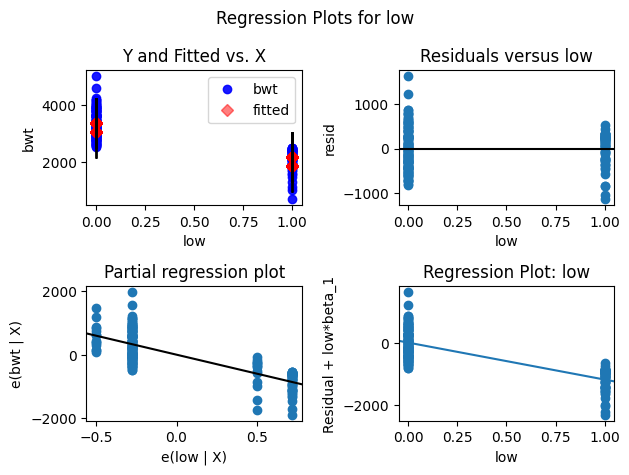

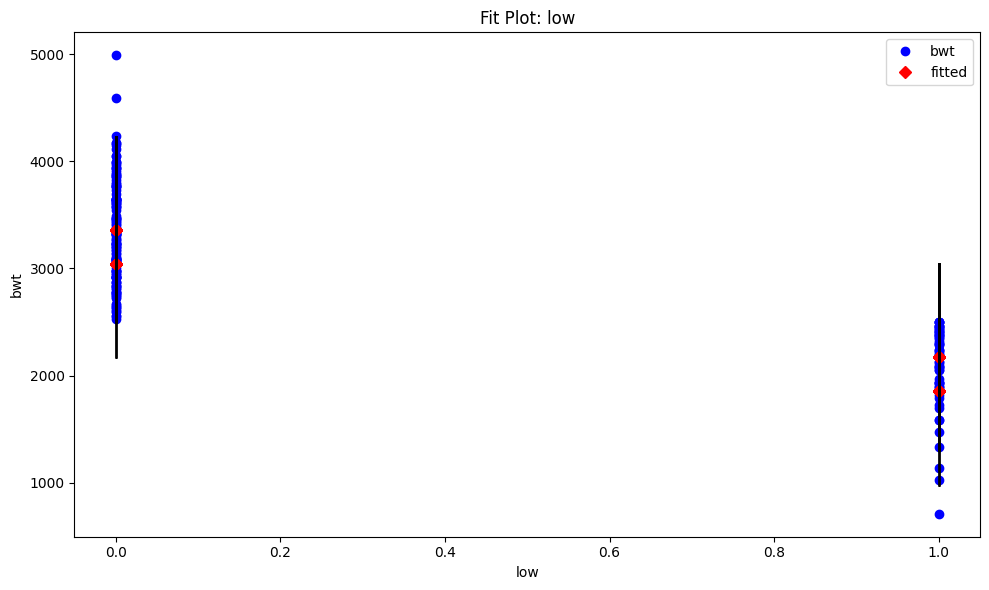

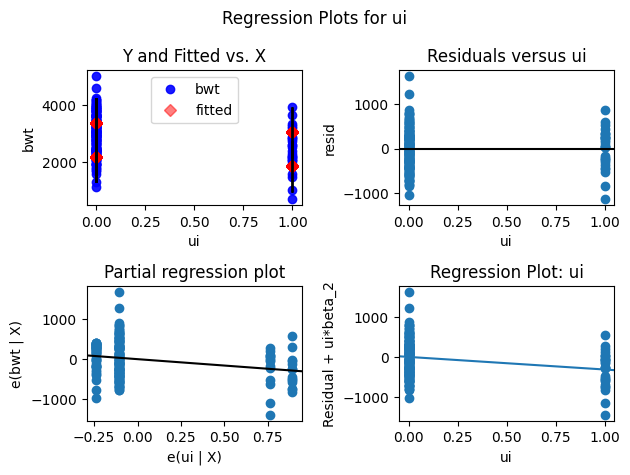

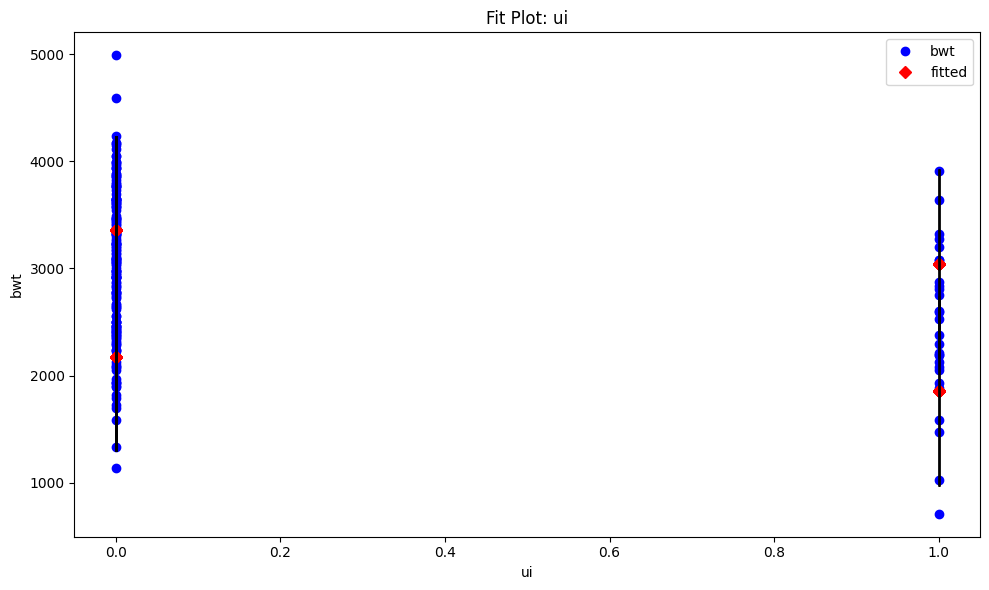

Variables in the final model:
['const', 'low', 'ui']


In [21]:
vars_to_plot = [var for var in final_vars if var != 'const'][:2]

for var in vars_to_plot:
    plot_var_diagnostics(var)

print("Variables in the final model:")
print(final_vars)

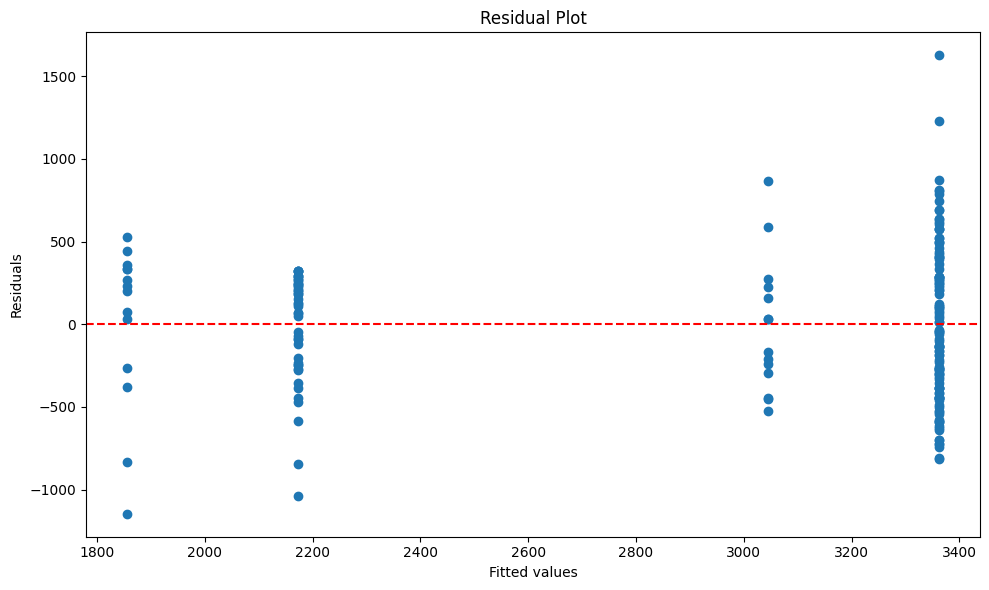

In [24]:
# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(final_model.fittedvalues, final_model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

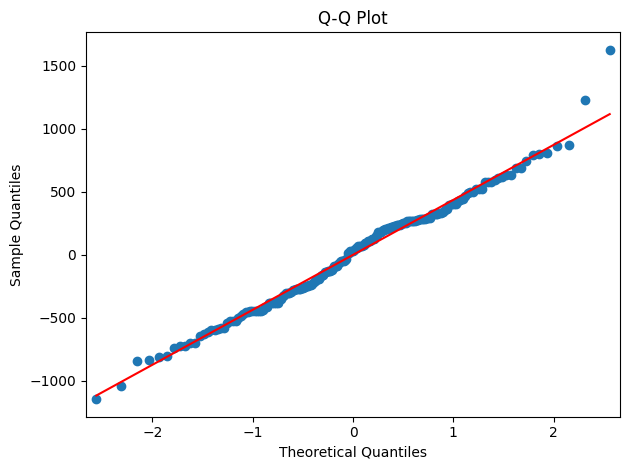

In [25]:
# QQ plot
qqplot(final_model.resid, line='s')
plt.title('Q-Q Plot')
plt.tight_layout()
plt.show()